# IMPORTING LIBRARIES

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# EXPLORING CAR DATASET: DATA COLLECTION AND PROCESSING


In [62]:
#Importing csv 
car = pd.read_csv("C:/Users/Shubhz/Desktop/Car.csv")

In [63]:
#inspecting rows of dataset
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [64]:
#checking number of missing values
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [65]:
#getting information about datset
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# CHECKING UNIQUE VALUES IN CATEGORICAL DATA

In [66]:
enginetype_unique = car['enginetype'].unique()
cylinders_unique = car['cylindernumber'].unique()
fueltype_unique = car['fueltype'].unique()
aspiration_unique = car['aspiration'].unique()
drivewheel_unique = car['drivewheel'].unique()
carbody_unique = car['carbody'].unique()

# Display the unique values
print("EngineType unique values:", enginetype_unique)
print("Cylinders unique values:", cylinders_unique)
print("FuelType unique values:", fueltype_unique)
print("Aspiration unique values:", aspiration_unique)
print("DriveWheel unique values:", drivewheel_unique)
print("CarBody unique values:", carbody_unique)

EngineType unique values: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
Cylinders unique values: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
FuelType unique values: ['gas' 'diesel']
Aspiration unique values: ['std' 'turbo']
DriveWheel unique values: ['rwd' 'fwd' '4wd']
CarBody unique values: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


# ENCODING CATEGORICAL VARIABLES

In [67]:
car.replace({
    'enginetype': {'dohc': 0, 'ohcv': 1, 'ohc': 2, 'l': 3, 'rotor': 4, 'ohcf': 5},
    'cylindernumber': {'four': 0, 'six': 1, 'five': 2, 'three': 3, 'twelve': 4, 'two': 5, 'eight': 6},
    'fueltype': {'gas': 0, 'diesel': 1},
    'aspiration': {'std': 0, 'turbo': 1},
    'drivewheel': {'rwd': 0, 'fwd': 1, '4wd': 2},
    'carbody': {'convertible': 0, 'hardtop': 1, 'hatchback': 2, 'sedan': 3, 'wagon': 4}
}, inplace=True)

# SPLITTING DATA AND TARGET

In [68]:
X = car.drop(['car_ID','CarName','symboling','doornumber','enginelocation','compressionratio',
              'stroke','boreratio','curbweight','fuelsystem'], axis=1)
Y = car['price']

In [69]:
print(X)

     fueltype  aspiration  carbody  drivewheel  wheelbase  carlength   
0           0           0        0           0       88.6      168.8  \
1           0           0        0           0       88.6      168.8   
2           0           0        2           0       94.5      171.2   
3           0           0        3           1       99.8      176.6   
4           0           0        3           2       99.4      176.6   
..        ...         ...      ...         ...        ...        ...   
200         0           0        3           0      109.1      188.8   
201         0           1        3           0      109.1      188.8   
202         0           0        3           0      109.1      188.8   
203         1           1        3           0      109.1      188.8   
204         0           1        3           0      109.1      188.8   

     carwidth  carheight  enginetype  cylindernumber  enginesize  horsepower   
0        64.1       48.8           0               0   

In [70]:
print(Y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


# SPLITTING TRAINING AND TEST DATA

In [71]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,random_state = 2)

# MODEL TRAINING

### 1.LINEAR REGRESSION

In [72]:
#Loading the Linear Regression model
ln_model = LinearRegression()

In [73]:
ln_model.fit(X_train,Y_train)

LinearRegression()

# MODEL EVALUATION (Train Data)

In [74]:
tr_data_pre = ln_model.predict(X_train)

In [75]:
R = metrics.r2_score(Y_train,tr_data_pre)
print("R squared Error :",R)

R squared Error : 1.0


# VISUALIZING ACTUAL PRICES AND PREDICTED PRICES (Train Data)

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

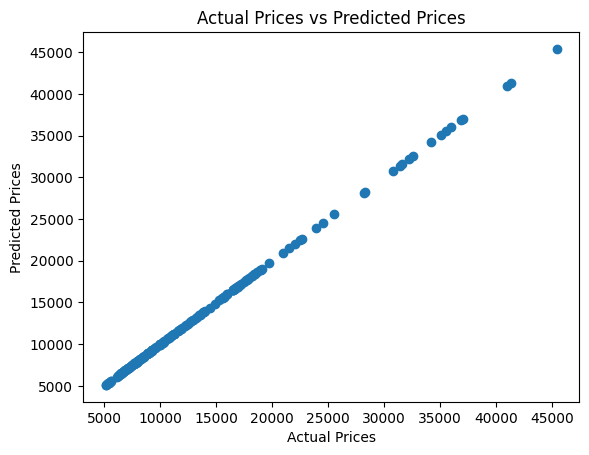

In [76]:
plt.scatter(Y_train,tr_data_pre)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')

# MODEL EVALUATION (Test Data)

In [77]:
te_data_pre = ln_model.predict(X_test)
R = metrics.r2_score(Y_test,te_data_pre)
print("R squared Error :",R)

R squared Error : 1.0


# VISUALIZING ACTUAL PRICES AND PREDICTED PRICES (Test Data)

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

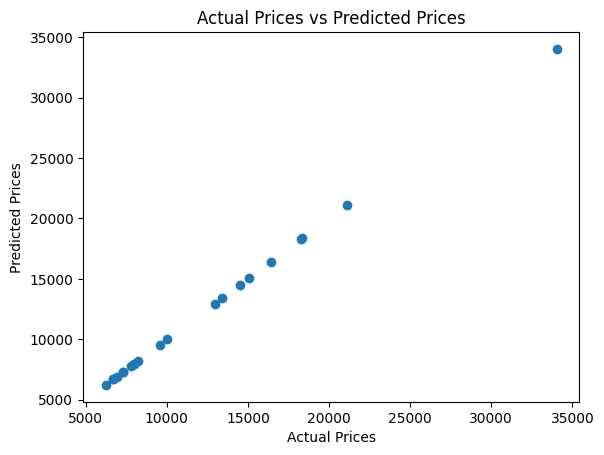

In [78]:
plt.scatter(Y_test,te_data_pre)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')